In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from skimage.transform import resize
import glob
import os
from sklearn.utils import shuffle

In [2]:
cats=glob.glob('./cat and dog/training_set/cats/*.jpg')
dogs=glob.glob('./cat and dog/training_set/dogs/*.jpg')


In [3]:
cats


['./cat and dog/training_set/cats\\cat.100.jpg',
 './cat and dog/training_set/cats\\cat.101.jpg',
 './cat and dog/training_set/cats\\cat.102.jpg',
 './cat and dog/training_set/cats\\cat.103.jpg',
 './cat and dog/training_set/cats\\cat.104.jpg',
 './cat and dog/training_set/cats\\cat.105.jpg',
 './cat and dog/training_set/cats\\cat.106.jpg',
 './cat and dog/training_set/cats\\cat.107.jpg',
 './cat and dog/training_set/cats\\cat.108.jpg',
 './cat and dog/training_set/cats\\cat.109.jpg',
 './cat and dog/training_set/cats\\cat.110.jpg',
 './cat and dog/training_set/cats\\cat.111.jpg',
 './cat and dog/training_set/cats\\cat.112.jpg',
 './cat and dog/training_set/cats\\cat.113.jpg',
 './cat and dog/training_set/cats\\cat.114.jpg',
 './cat and dog/training_set/cats\\cat.115.jpg',
 './cat and dog/training_set/cats\\cat.116.jpg',
 './cat and dog/training_set/cats\\cat.117.jpg',
 './cat and dog/training_set/cats\\cat.118.jpg',
 './cat and dog/training_set/cats\\cat.119.jpg',
 './cat and dog/trai

In [4]:
dogs

['./cat and dog/training_set/dogs\\dog.106.jpg',
 './cat and dog/training_set/dogs\\dog.107.jpg',
 './cat and dog/training_set/dogs\\dog.108.jpg',
 './cat and dog/training_set/dogs\\dog.109.jpg',
 './cat and dog/training_set/dogs\\dog.110.jpg',
 './cat and dog/training_set/dogs\\dog.111.jpg',
 './cat and dog/training_set/dogs\\dog.112.jpg',
 './cat and dog/training_set/dogs\\dog.113.jpg',
 './cat and dog/training_set/dogs\\dog.114.jpg',
 './cat and dog/training_set/dogs\\dog.115.jpg',
 './cat and dog/training_set/dogs\\dog.116.jpg',
 './cat and dog/training_set/dogs\\dog.117.jpg',
 './cat and dog/training_set/dogs\\dog.118.jpg',
 './cat and dog/training_set/dogs\\dog.119.jpg',
 './cat and dog/training_set/dogs\\dog.120.jpg',
 './cat and dog/training_set/dogs\\dog.121.jpg',
 './cat and dog/training_set/dogs\\dog.122.jpg',
 './cat and dog/training_set/dogs\\dog.123.jpg',
 './cat and dog/training_set/dogs\\dog.124.jpg',
 './cat and dog/training_set/dogs\\dog.125.jpg',
 './cat and dog/trai

In [5]:
print("number of images,cats:",len(cats),"dogs:",len(dogs))

number of images,cats: 108 dogs: 107


## creating a training set

In [6]:
images = []
label = []
for path_of_cat_image in cats:
  img = plt.imread(path_of_cat_image)
  images.append(img)
  label.append(0)
for path_of_dog_image in dogs:
  img = plt.imread(path_of_dog_image)
  images.append(img)
  label.append(1)

In [7]:
images, label = shuffle(images, label, random_state= 100)

## plotting some images

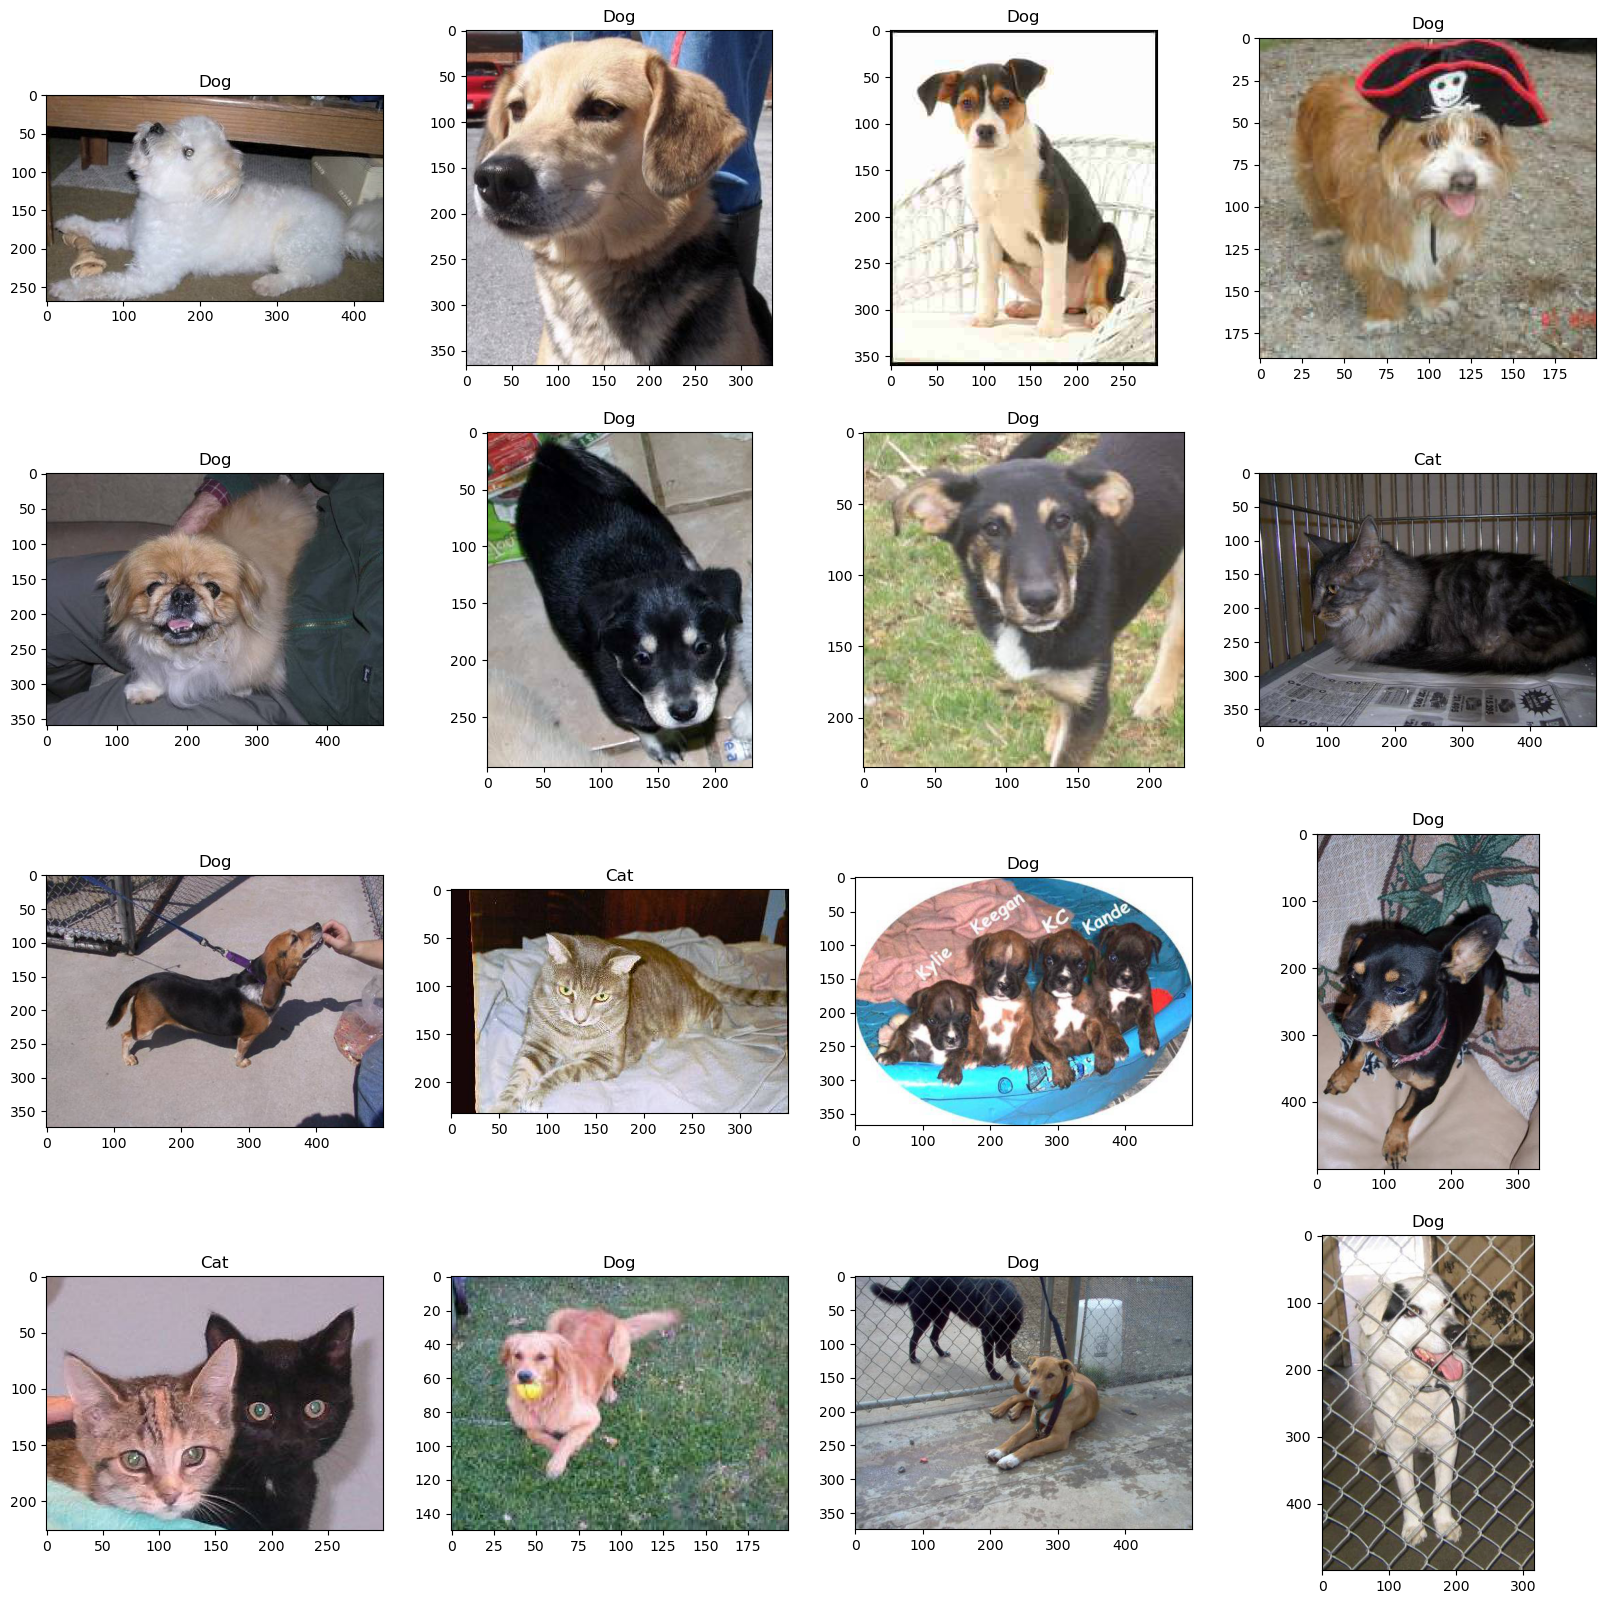

In [8]:
plt.figure(figsize= (20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(images[i])
  if label[i] == 1:
    plt.title("Dog")
  else:
    plt.title("Cat")

In [9]:
x_train=[]
for image in images:
    x_train.append(resize(image,(64,64,3)))
x_train=np.array(x_train)

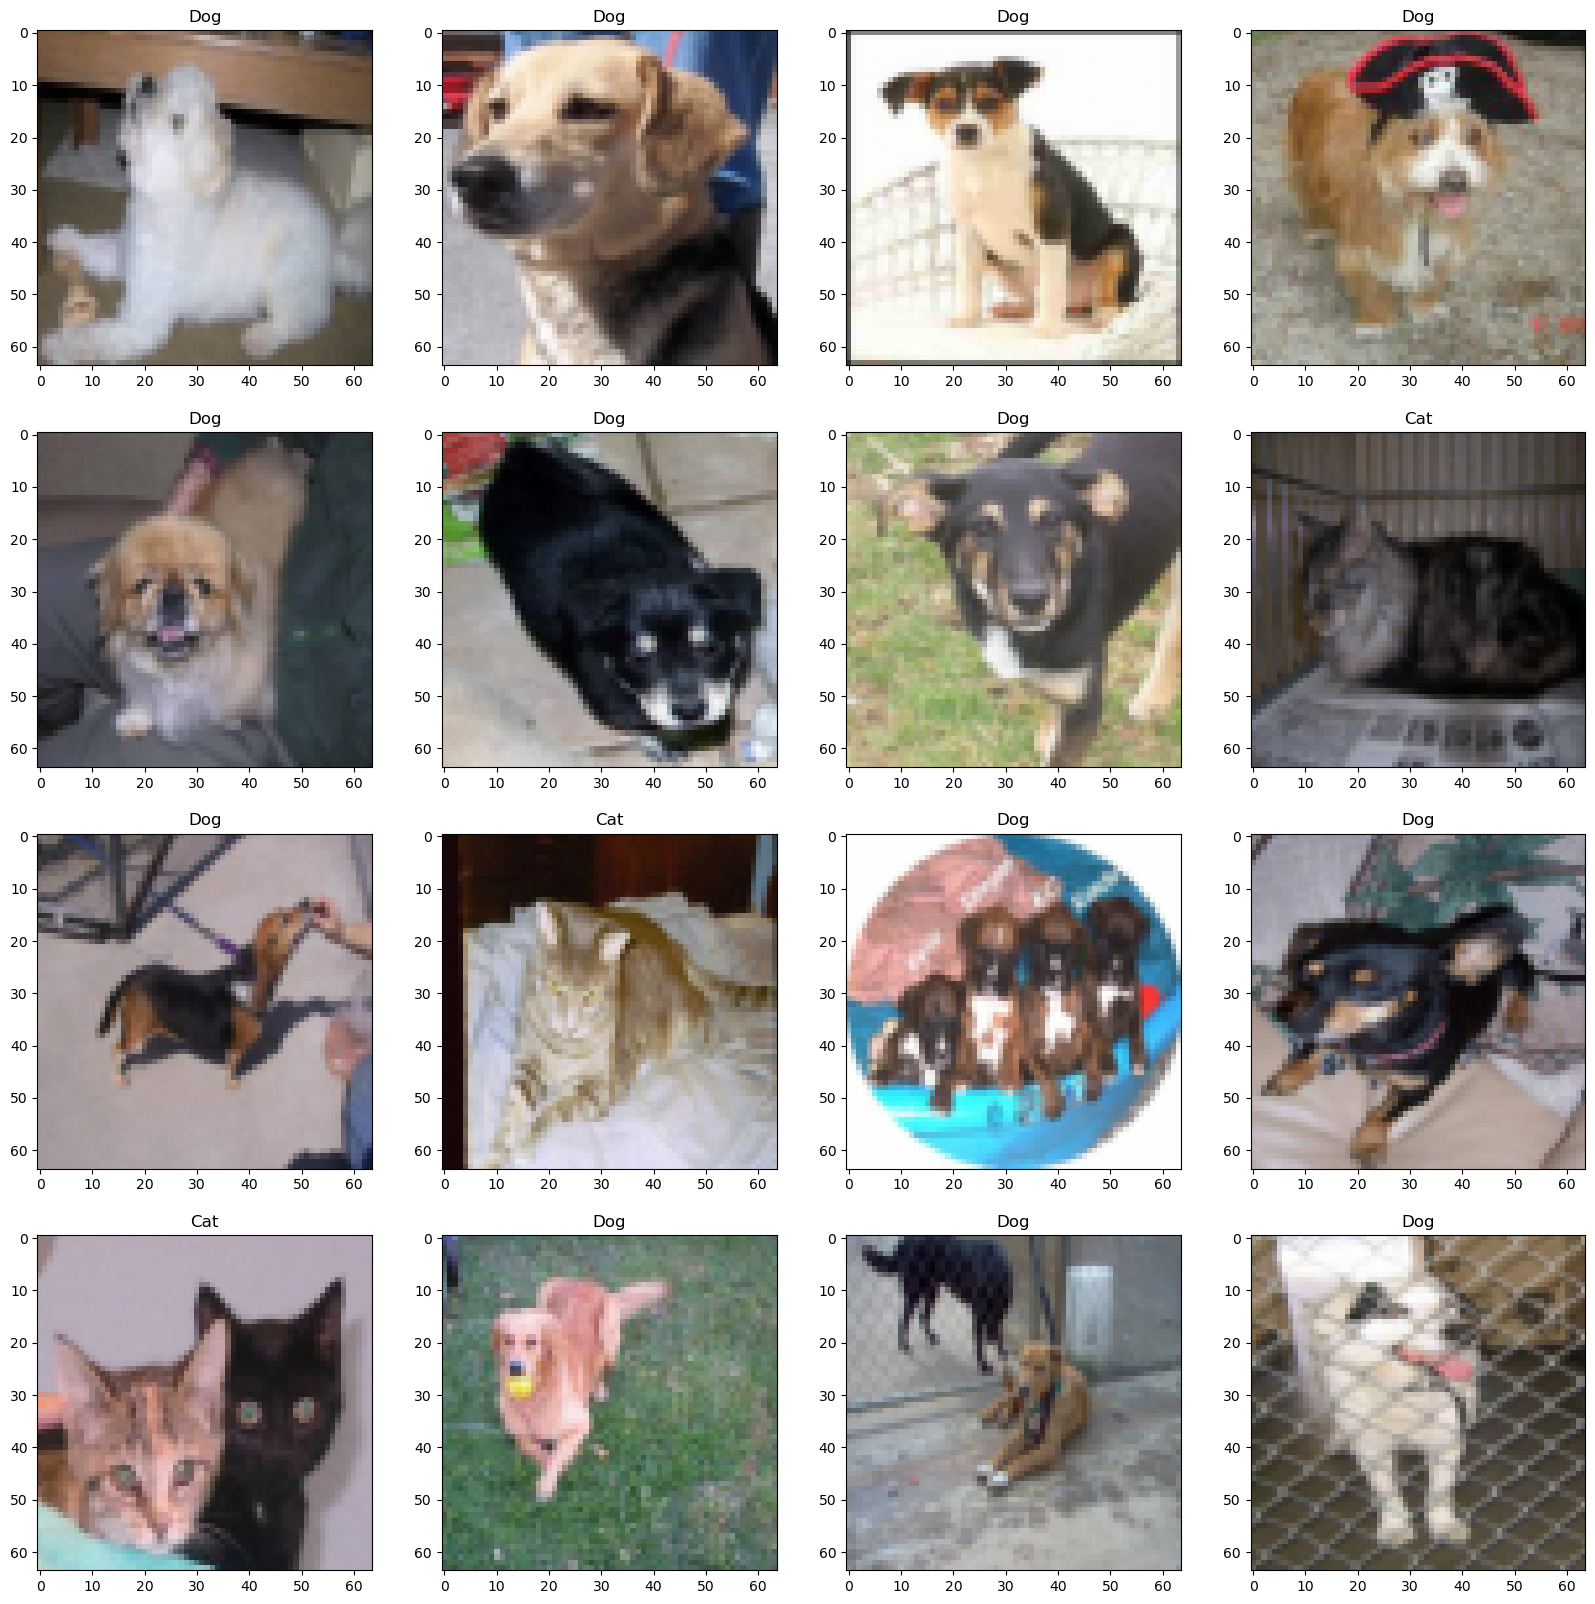

In [10]:
plt.figure(figsize= (20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
  if label[i] == 1:
    plt.title("Dog")
  else:
    plt.title("Cat")

In [11]:
y_train=np.array(label)

In [12]:
x_train.shape

(215, 64, 64, 3)

In [13]:
y_train.shape

(215,)

## creating CNN using the sequential model

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64,activation='relu'),
    
    keras.layers.Dense(1,activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4916 - loss: 0.7557
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5444 - loss: 0.6858
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5417 - loss: 0.6762
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6634 - loss: 0.6584
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6615 - loss: 0.6415
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6365 - loss: 0.6219
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7272 - loss: 0.5875
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7829 - loss: 0.5422
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6655 - loss: 0.5694
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7789 - loss: 0.5445
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7460 - loss: 0.5241
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7875 - loss: 0.4668
E

In [17]:
cats_test=glob.glob('./cat and dog/test_set/cats/*.jpg')
dogs_test=glob.glob('./cat and dog/test_set/dogs/*.jpg')


In [18]:
print("number of images,cats:",len(cats_test),"dogs:",len(dogs_test))

number of images,cats: 38 dogs: 56


In [19]:
image_test=[]
label_test=[]
for path_of_cat_image in cats:
  img = plt.imread(path_of_cat_image)
  image_test.append(img)
  label_test.append(0)
for path_of_dog_image in dogs:
  img = plt.imread(path_of_dog_image)
  image_test.append(img)
  label_test.append(1)

In [20]:
image_test, label_test = shuffle(image_test, label_test, random_state= 100)

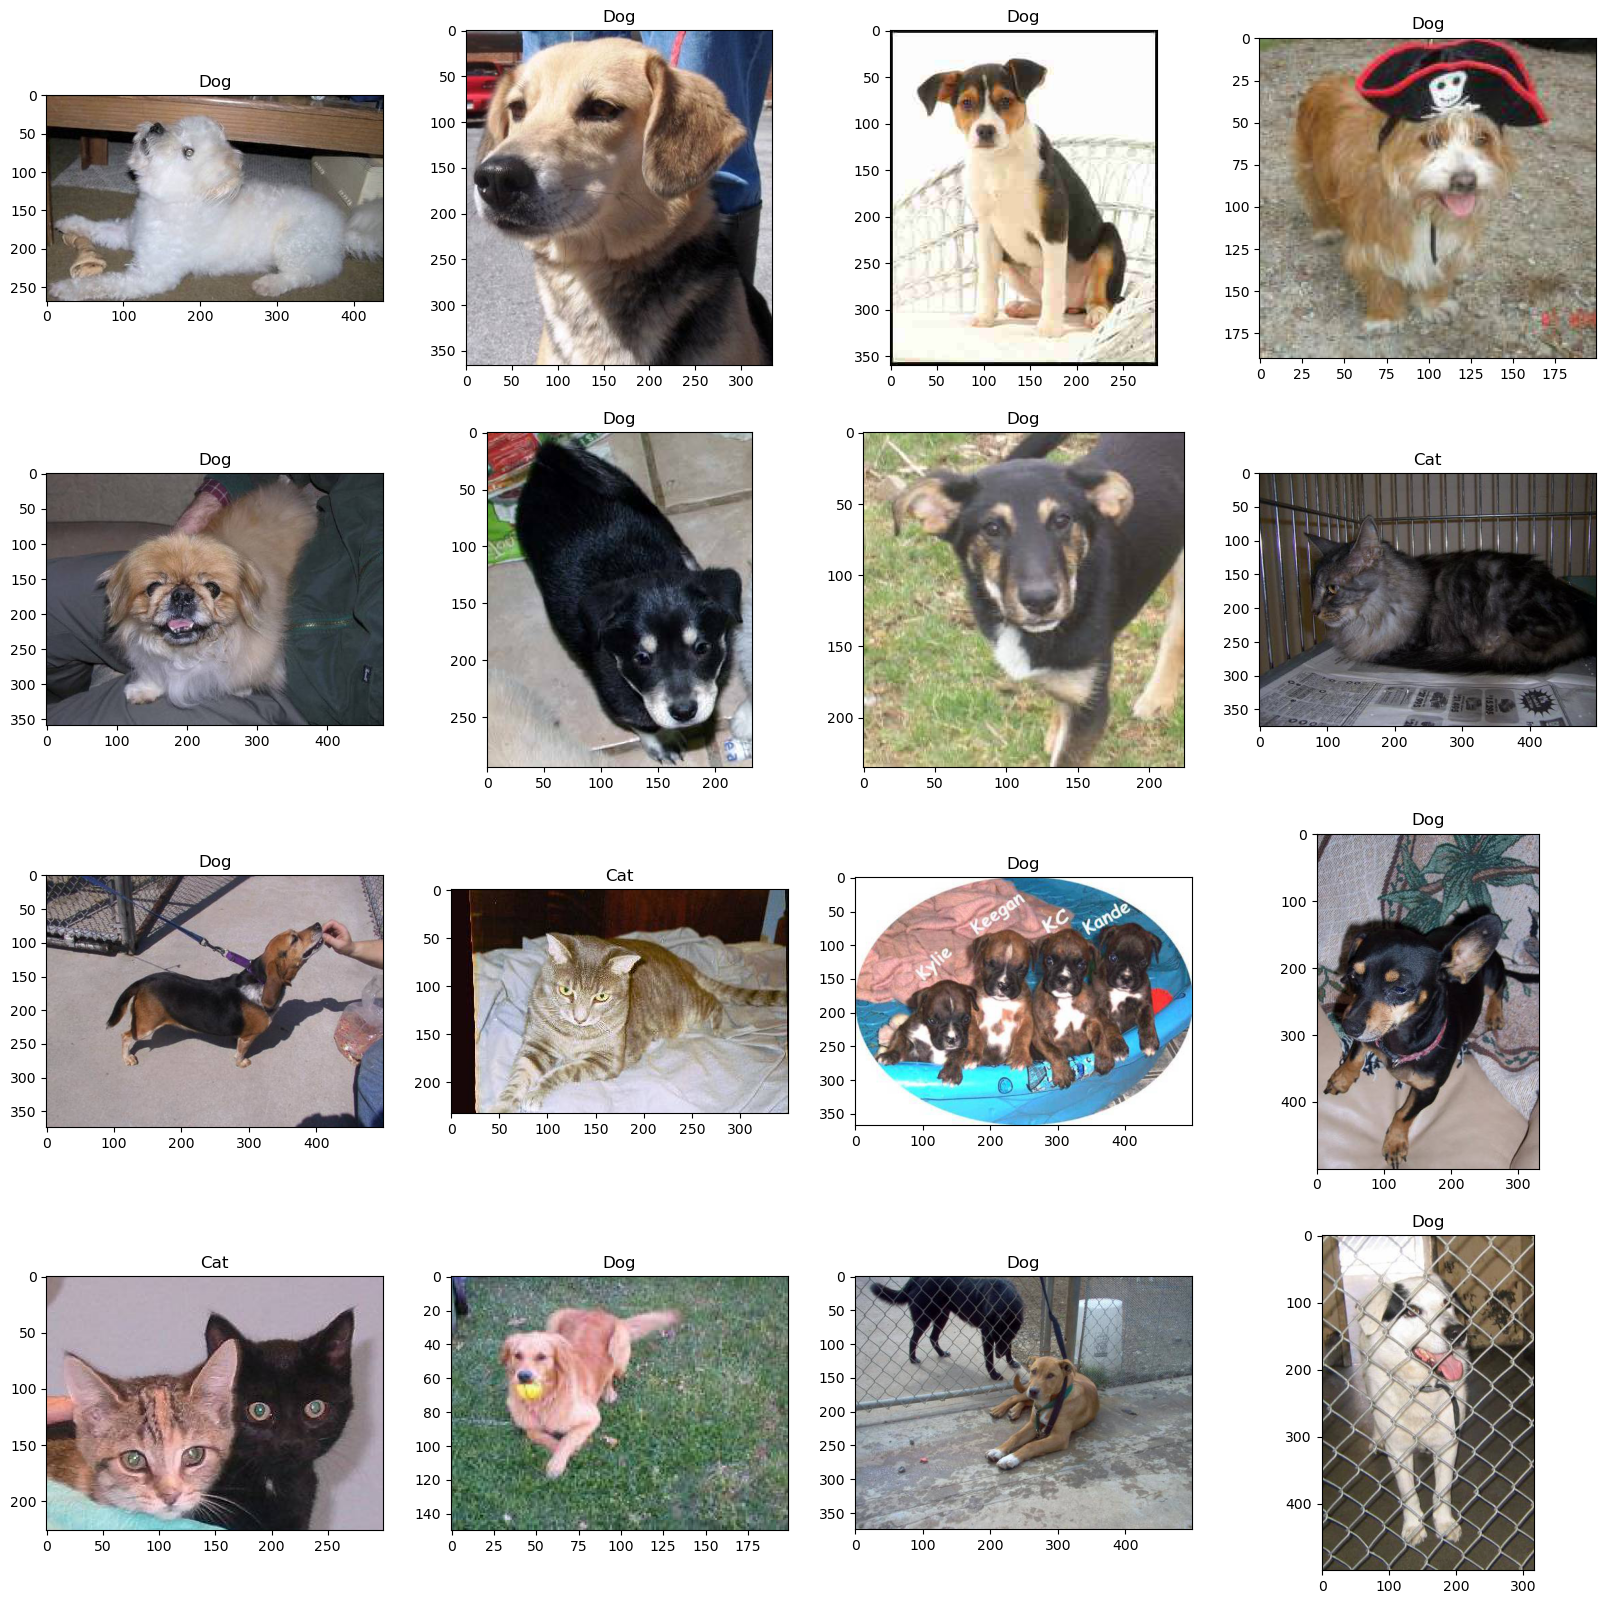

In [24]:
plt.figure(figsize= (20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(image_test[i])
  if label[i] == 1:
    plt.title("Dog")
  else:
    plt.title("Cat")

In [22]:
x_test=[]
for i in image_test:
    x_test.append(resize(i,(64,64,3)))
x_test=np.array(x_test)
# y_test=np.array(label_test)

In [23]:
x_test.shape

(215, 64, 64, 3)

In [24]:
y_test=np.array(label_test)

In [25]:
prediction=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [26]:
prediction

array([[9.7655803e-01],
       [9.8513883e-01],
       [9.8506302e-01],
       [9.9907595e-01],
       [9.1552460e-01],
       [9.9289149e-01],
       [9.4581562e-01],
       [6.8135401e-03],
       [9.9849784e-01],
       [3.3951292e-06],
       [9.9789566e-01],
       [9.6570617e-01],
       [5.4306020e-03],
       [9.5208514e-01],
       [9.7586638e-01],
       [9.7400439e-01],
       [9.6869320e-01],
       [9.9671853e-01],
       [1.0470131e-04],
       [9.9145812e-01],
       [9.8801810e-01],
       [2.2459520e-02],
       [1.2813209e-03],
       [9.8594397e-01],
       [2.6398083e-02],
       [8.9516699e-01],
       [4.3640453e-03],
       [9.5393932e-01],
       [2.4605561e-03],
       [8.8978809e-01],
       [9.7988379e-01],
       [2.0567395e-02],
       [1.4621817e-03],
       [2.9585122e-03],
       [9.9750161e-01],
       [9.9994099e-01],
       [2.7516973e-03],
       [9.4812751e-01],
       [5.3240811e-03],
       [9.9936128e-01],
       [9.6431524e-01],
       [9.941412

In [27]:
pred=[]

for i in prediction:
    if i > 0.5:
        pred.append(0)
    else:
        pred.append(1)

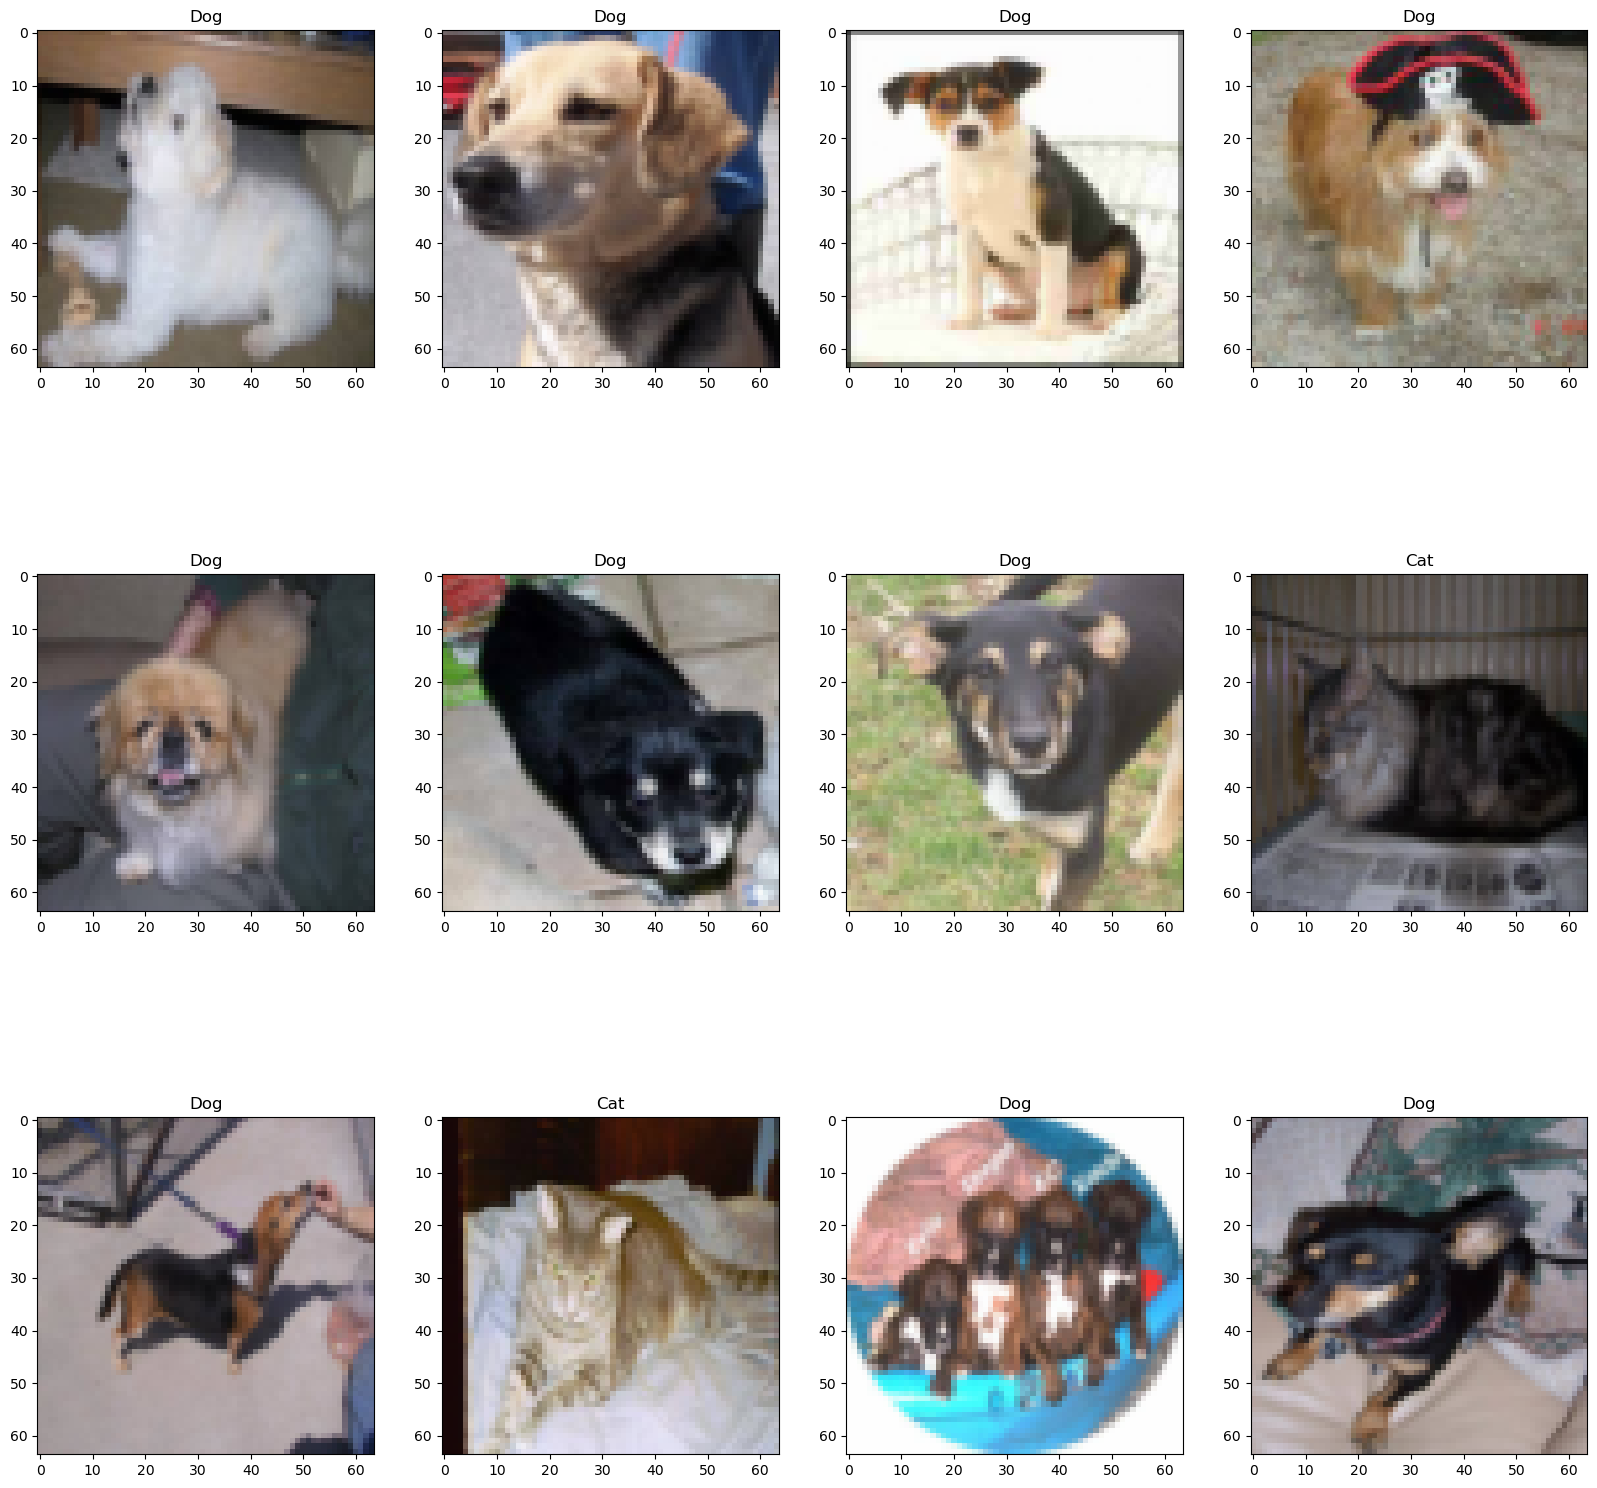

In [28]:
plt.figure(figsize= (20, 20))
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(x_test[i])
  if label_test[i] == 1:
    plt.title("Dog")
  else:
    plt.title("Cat")